# Diwali Sales Data Analysis

- Importing data using pandas and encoding='latin-1'

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\91620\\Desktop\\Diwali Data\\Diwali_Sales.csv", encoding = "latin-1")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [88]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [9]:
df.shape

(11251, 15)

In [10]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

User_ID             0.0
Cust_name           0.0
Product_ID          0.0
Gender              0.0
Age Group           0.0
Age                 0.0
Marital_Status      0.0
State               0.0
Zone                0.0
Occupation          0.0
Product_Category    0.0
Orders              0.0
Amount              0.0
Status              0.0
unnamed1            0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           0 non-null      int64  
 1   Cust_name         0 non-null      object 
 2   Product_ID        0 non-null      object 
 3   Gender            0 non-null      object 
 4   Age Group         0 non-null      object 
 5   Age               0 non-null      int64  
 6   Marital_Status    0 non-null      int64  
 7   State             0 non-null      object 
 8   Zone              0 non-null      object 
 9   Occupation        0 non-null      object 
 10  Product_Category  0 non-null      object 
 11  Orders            0 non-null      int64  
 12  Amount            0 non-null      float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 0.0+ bytes


In [13]:
df["Amount"] = df["Amount"].astype('int')

In [14]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount                int32
Status              float64
unnamed1            float64
dtype: object

In [15]:
df.describe()                                         
#this will only show the description of those values having data in numbers.

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis


## Genderwise Sales

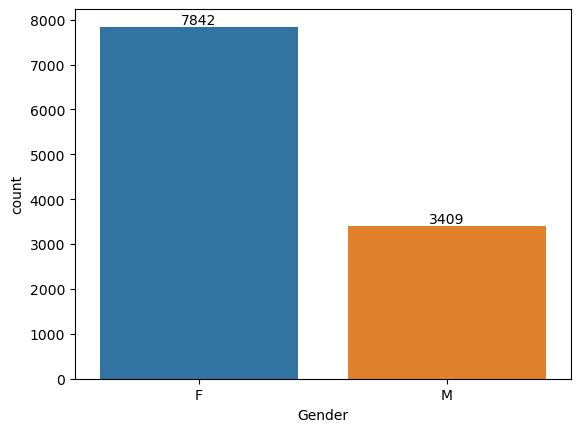

In [32]:
import seaborn as sns
plot = sns.countplot(data = df , x= "Gender")

for num in plot.containers:
    plot.bar_label(num)

In [33]:
sales_gender  = df.groupby(['Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_gender

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


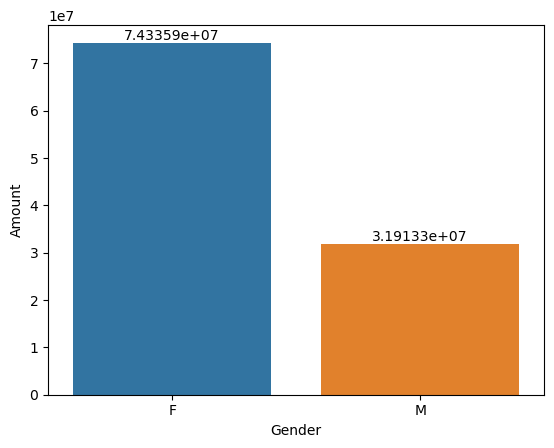

In [36]:
plot_gender = sns.barplot(x="Gender", y = "Amount", data=sales_gender)

for num in plot_gender.containers:
    plot_gender.bar_label(num)

# AGE

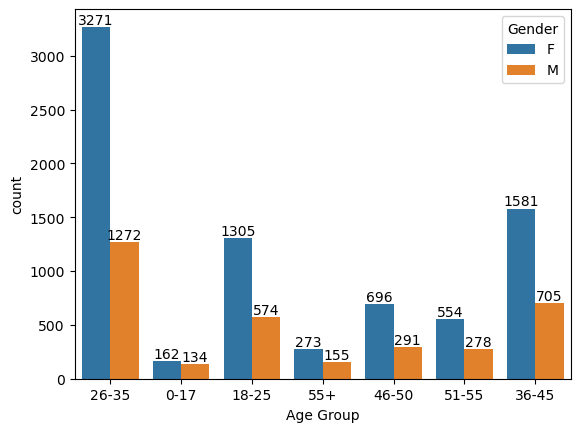

In [38]:
age = sns.countplot(x= "Age Group", data=df, hue='Gender')

for num in age.containers:
    age.bar_label(num)

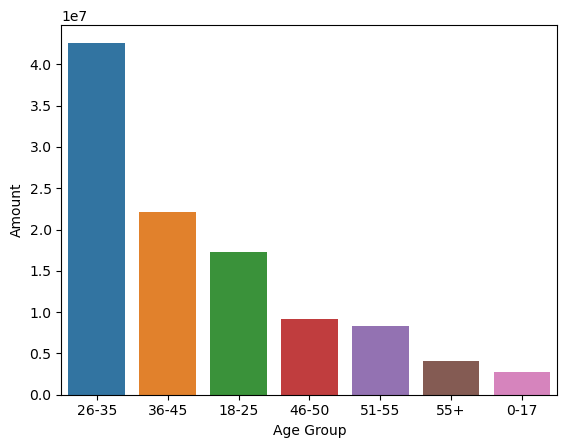

In [44]:
sales_by_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sales_by_age = sns.barplot(x= "Age Group", y = "Amount", data = sales_by_age)

# STATE WITH MOST ORDERS

<Axes: xlabel='Orders', ylabel='State'>

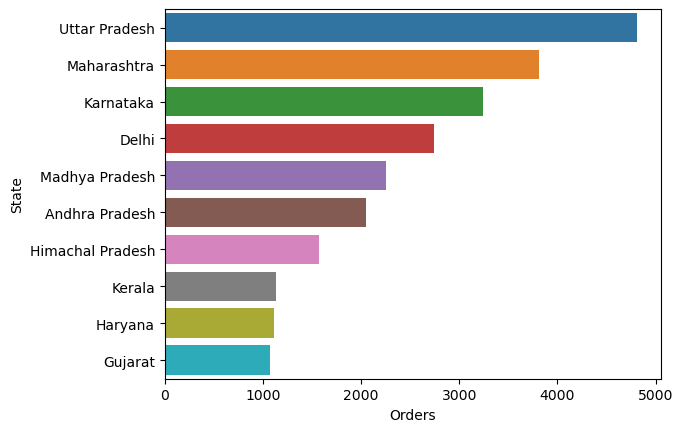

In [48]:
state_orders = df.groupby(["State"], as_index=False)['Orders'].sum().sort_values(by="Orders", ascending=False)[:10]
sns.barplot(x='Orders', y="State", data=state_orders)



# Occupation

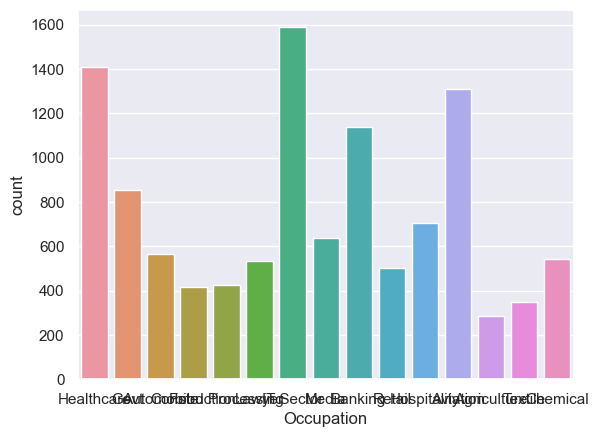

In [110]:
occupation = sns.countplot(x='Occupation', data=df)

#sns.set(rc={'figure-figsize':(20,5)})



In [74]:

occupation = df.groupby(["Occupation"],as_index=False)["Orders"].sum().sort_values(by="Orders", ascending = False).head(5)
occupation

,Occupation,Orders
10,IT Sector,4010
8,Healthcare,3455
2,Aviation,3215
3,Banking,2819
7,Govt,2155


<Axes: xlabel='Occupation', ylabel='Orders'>

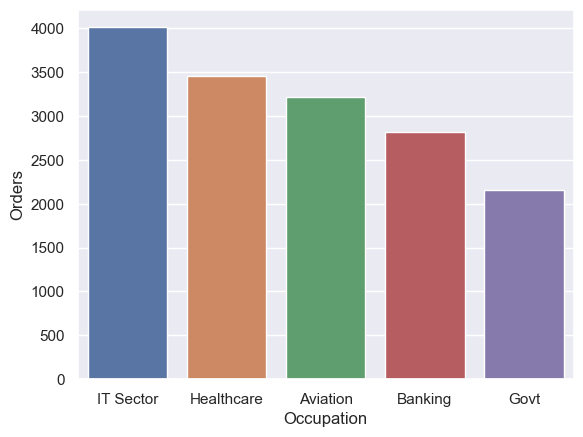

In [76]:
sns.barplot(x="Occupation", y="Orders", data=occupation)

In [90]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Marital_Status Data 

<Axes: xlabel='Marital_Status', ylabel='count'>

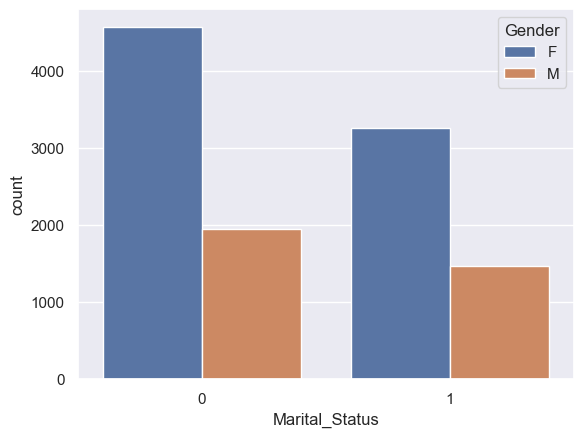

In [93]:
sns.countplot(x='Marital_Status',data=df, hue='Gender')

## Gender
###### Females are more active than Men when 7842 in number while men are only 3409. 
## Age Group
###### Age group of 26-35 are most active buyers among others followed by age groups of 36-45.
## Age 
###### Customers of Age between 26-35 spend more amount rather than any other age.
## Martial Status
###### Married Females tends to buy more in comparison to all married men as well as unmarried men and women.
## State
###### Uttar Pradesh , Maharashtra , Karnataka are the state with most orders. Followed by Delhi , Madhya pradesh and Andhra Pradesh respectively.
## Occupation
###### The top 5 occupation with high orders of buying are IT , Healthcare ,  Aviation , Banking and Government Jobs











## Amount
###### The most of the amount is spent by Married Females within age group of 26-35 working in IT, HealthCare, Aviation from Uttar Pradesh, Maharashtra and Karnataka. 

# CONCLUSION

The most of the amount is spent by Married Females within age group of 26-35 working in IT, HealthCare, Aviation from Uttar Pradesh, Maharashtra and Karnataka.